# Chapter 2: The iris dataset - your first neural network
Last chapter we discussed what Tensorflow is and how the graph building works. This chapter we are going to put this knowledge to use, and we will try to classify several flower species. 



## Section 1: downloading the data, and visualising it
In this chapter we will try to classify three species of the **iris flower**. The iris dataset contains fifty measurements of three different species of iris flowers (a total of 150 datapoints). 

The species we try to categorize are: 

The iris setosa: ![setosa](https://upload.wikimedia.org/wikipedia/commons/1/11/Iris_setosa_2.jpg)
The iris versicolor: ![versicolor](https://upload.wikimedia.org/wikipedia/commons/3/30/Iris_versicolor_2.jpg)
The iris verginica: ![verginica](https://upload.wikimedia.org/wikipedia/commons/2/27/Southern_Blue_Flag_Iris_%28iris_virginica%29_-_Flickr_-_Andrea_Westmoreland.jpg)

A scientist many years ago tried if he could find a difference between these species based on the petal width and height, and the sepal width and height: 
![petal sepal](http://www.pinchofintelligence.com/wp-content/uploads/2017/08/iris-explanation.jpg)

The iris dataset is an excellent dataset to explain details of neural networks.




### Downloading and importing the dataset
The iris dataset is so interesting that it is included in the sklearn python package that was installed in your Docker image. Let's start by loading the data, and several important libraries we are going to use today:


In [3]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(iris)

{'target_names': array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10'), 'feature_names': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), 'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sep

In [3]:
print(iris.data[0:10,:])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


The best way to see if they are (linearly) seperable is by building a scatter plot:


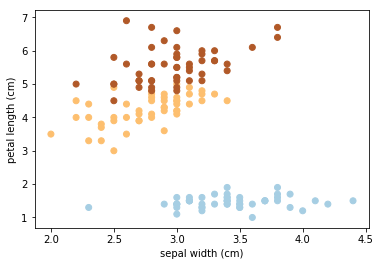

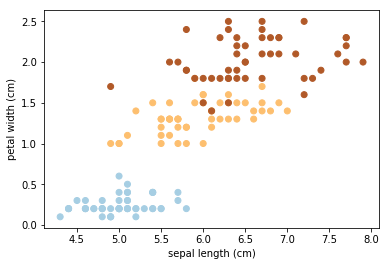

In [5]:
plt.scatter(iris.data[:,1], iris.data[:,2], c=iris.target, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

plt.scatter(iris.data[:,0], iris.data[:,3], c=iris.target, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])

Looks like we should be able to at least filter out the blue class. We probably should be able to classify most of the brown classes, but that might be a bit more difficult. Because we have **data overlap** it's difficult to seperate these data points perfectly. In this section we will see how far we come. 

## Section 2: The human brain, and how to formalize it: your first single layer neural network 
Here are some images of neurons in the human brain: 
![neuron 1](https://upload.wikimedia.org/wikipedia/commons/f/fb/Gyrus_Dentatus_40x.jpg)
![neuron 2](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Neuron.svg/400px-Neuron.svg.png)
![neuron 3](http://www.pinchofintelligence.com/wp-content/uploads/2017/09/Neuron-activation.jpg)

This inspired people long ago to define mathematical models: 
The artificial neuron looks like this: 
<img src="https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png" alt="Drawing" style="width: 600px;"/>


You can even put multiple artificial neurons together to create your **neural network**: 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/2000px-Artificial_neural_network.svg.png" alt="Drawing" style="width: 400px;"/>

See some stuff here: 
http://www.pinchofintelligence.com/wp-content/uploads/2017/01/Neural-Machine-Translation-For-language-professionals.pdf

### Forward propagation with numpy
Let's take the sepal width and sepal length, and try to create a network that gives an activation for each of the classes. 

In [6]:
print("Targets: " + str(iris.target_names))
print("Features: " + str(iris.feature_names))


Targets: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Now we can see that the setosa has a smaller petal length than the versicolor. If we were to make such a neural network:

We can kind of fill in the weights ourselves to go to an **activation** per output neuron. 
Right now our data is not seperable without a bias, I will add one to make it easy for our neural network. 

![single layers](illustrations/singlelayers.png)


We can define this as a matrix multiplication. If you are new to this, take a look at this Youtube video: https://www.youtube.com/watch?v=kqWCwwyeE6k

Now lets' try to implement the network we made in Numpy: 

In [9]:
import numpy as np
#np.array([[w_1_1, w_1_2], [w_2_1, w_2_2])
mult_matrix = np.array([[-0.2, 0.2], [-1.0, 1.0]])

for features in iris.data:
    our_features = [features[2]-3, features[3]-2]
    print(our_features)
    a = np.matmul(our_features, mult_matrix)
    print("activations: " + str(a))

[-1.6000000000000001, -1.8]
Activations: [ 0.9020312  0.0979688]
[-1.6000000000000001, -1.8]
Activations: [ 0.9020312  0.0979688]
[-1.7, -1.8]
Activations: [ 0.90378446  0.09621554]
[-1.5, -1.8]
Activations: [ 0.90024951  0.09975049]
[-1.6000000000000001, -1.8]
Activations: [ 0.9020312  0.0979688]
[-1.3, -1.6000000000000001]
Activations: [ 0.87653295  0.12346705]
[-1.6000000000000001, -1.7]
Activations: [ 0.89283193  0.10716807]
[-1.5, -1.8]
Activations: [ 0.90024951  0.09975049]
[-1.6000000000000001, -1.8]
Activations: [ 0.9020312  0.0979688]
[-1.5, -1.8999999999999999]
Activations: [ 0.90887704  0.09112296]
[-1.5, -1.8]
Activations: [ 0.90024951  0.09975049]
[-1.3999999999999999, -1.8]
Activations: [ 0.89843907  0.10156093]
[-1.6000000000000001, -1.8999999999999999]
Activations: [ 0.91051994  0.08948006]
[-1.8999999999999999, -1.8999999999999999]
Activations: [ 0.91528943  0.08471057]
[-1.8, -1.8]
Activations: [ 0.90550963  0.09449037]
[-1.5, -1.6000000000000001]
Activations: [ 0.880

### Results
The results we got with this simple matrix multiplication are kind of ok, but only because we changed the input parameters! It only predicts the first class, which is pretty logical as our multiply function can't even fit the data. Later in the course you will learn about preprocessing of your data, with that step this network should be able to kind of 'fit' the data. 

### Bias 
As you saw we reduced the inputs of our network with a certain value. Sometimes we want to have a bias on a neuron: some neurons should always be kind of activated, and some neurons should be difficult to activate. The same goes on in our brain: some neurons have a lot of connections coming in, while some others are difficult to activate. 

In numpy code this could look like this: 


In [ ]:
import numpy as np
#np.array([[w_1_1, w_1_2], [w_2_1, w_2_2])
mult_matrix = np.array([[-0.2, 0.2], [-1.0, 1.0]])
bias = np.array([0.1, -0.1])
for features in iris.data:
    our_features = [features[2]-3, features[3]-2]
    print(our_features)
    a = np.matmul(our_features, mult_matrix)
    a = a + bias
    print("activations: " + str(a))


### Activation function
As we saw in our brain activation function a cell becomes VERY active after it reached a certain treshold of incoming activation. We want the same to happen in our artificial neural network: an outputcell should have a high activity if it knows it's activated. 

To do this we apply an "activation function" to our output neurons. To speed up the course from the math to practice I will quickly show you the sigmoid activation function in an image: 
![sigmoid activation function](https://qph.ec.quoracdn.net/main-qimg-2f0e7ccc8fd54e238ae46a3d5fcc6908?convert_to_webp=true)
We apply this function to the result of our matrix multiplication. If this result is high, our activation will be one. If this result is 0, our activation will be 0.5. If this result is very negative, our activation will be 0. In later videos we will talk about activation functions, and how to use them, but for now: just keep in mind that we do this. 

In our numpy forward-propagation neural network the final activation would become:


In [ ]:
import numpy as np

def sigmoid(activations):
    return 1 / (1 + np.exp(-activations))

#np.array([[w_1_1, w_1_2], [w_2_1, w_2_2])
mult_matrix = np.array([[-0.2, 0.2], [-1.0, 1.0]])
bias = np.array([0.1, -0.1])

for features in iris.data:
    our_features = [features[2]-3, features[3]-2]
    print(our_features)
    a = np.matmul(our_features, mult_matrix)
    a = a + bias
    a = sigmoid(a)
    print("activations: " + str(a))

## Section 3: The math behind optimization: backpropagation + understanding the gradients 

In section 2 we saw that a single-layer neural network with some adjustments can see the difference between two flowers. We constructed our network manually, and used all our knowledge about the datasets to set the weights ourself. Now imagine that we will make a way deeper network: 
![larger network](https://upload.wikimedia.org/wikipedia/commons/8/8b/Neural_network_bottleneck_achitecture.svg)
This network can make better predictions, but manually adjusting the weights is something we definitely don't want to do. 

**Training** our network means that we **back propagating** the **error** the network made. After our network made a prediction we compare this prediction with the numbers we wanted to see as output. We then take a look at what weights in the network contibuted to this output and adjust these weights to better reflect what we expected from them. The amount in which we adjust them is called the **learning rate**. 

A great post that really dives into the mathematical background of backpropagation is this one, by [Matt Mazur](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/). 

Now let's take a look at how we can implement a single layer neural network in Tensorflow, and see how we can train it. 

In [ ]:
import tensorflow as tf
tf.reset_default_graph()

n_input = len(iris.data[0])
n_output = 3 # [0,1,2]... set(iris.target)

input_shape = [None,n_input]
inputplaceholder = tf.placeholder(dtype=tf.float32, shape=input_shape, name="input_placeholder") # https://www.tensorflow.org/api_docs/python/tf/placeholder

weights = tf.Variable(tf.random_normal([n_input, n_output]), name="weights")
biases = tf.Variable(tf.zeros([n_output]), name="biases")

print(weights)
print(biases)

layer_1 = tf.matmul(inputplaceholder, weights)
layer_2 = tf.add(layer_1, biases)
outputlayer = tf.nn.sigmoid(layer_2)

print(outputlayer)



This gives us this graph in Tensorflow: 
![graph single layer](illustrations/singlelayer_tensorflow.png)

## Training your network
Well, looks like we have a neural network that doesn't really do anything. We only did **forward propagation**, but our network does not learn anything. We are going to train our neural network using **backpropagation**. We expect that all output is wrong (we used a random initialised matrix). We can define a certain **cost** for the error our network makes, by applying a [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)

If we want the activation of class 0 to be higher, and of class 1 and 1 to be lower, we should change the weights that contributed to the wrong output. As we don't know what the ideal weights are we are only going to change them a little bit, and hope that this helps. 

Let's determine what weights to lower based on the **gradient**, and lower them proportionally to the **cost**. To define how hard we change them we define a **learning rate**. If our learning rate is low we only change our weighs a little bit, if our learning rate is high we change them a lot!

This method is called **gradient descent**. You look where the wrong output is coming from (the gradient), and lower the weights that contributed to this. Tensorflow has a function for this! We only need to define our cost function (which is based on the output we expected), the cost (how wrong the network is), and how we **optimize** our neural network. 

In [ ]:
learning_rate = 0.1

labelsplaceholder = tf.placeholder(dtype=tf.float32, shape=[None,n_output], name="labels_placeholder")
cost = tf.losses.mean_squared_error(labelsplaceholder, outputlayer) # https://www.tensorflow.org/api_docs/python/tf/losses/mean_squared_error

print(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) #https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer

This gives us the following graph: 
![inc optimizer](illustrations/singlelayer_tensorflow_inc_optimizer.png)

### Actually training your network

Above you saw how we defined our network. There are some variables in our computational graph who are not yet initialised. The weights we made will be initialised with random normal numbers (see graph above). In chapter 1 you already learned that you have to initialise your graph by starting a session and running the `tf.global_variables_initializer()` function. Let's do that: 

In [ ]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)


### Standardizing data
There is one trick we used in the manual network we made above: instead of feeding the raw measurements we reduced the numbers a bit to make learning easier. In the next chapter we will dive into why we use this trick, and how we apply it. For now I will just type this code: 

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(iris.data)
scaled_data = scaler.transform(iris.data)


### Output of the network: one-hot vectors
As you already kind of saw above we don't let our network output a number like 0, 1, or 2: we output a **one-hot vector**. As you can see the data we have right now does not really support that. This is why we turn the data into a one-hot vector during training. Note that there are functions that [do this for us](https://www.tensorflow.org/api_docs/python/tf/one_hot) (`tf.one_hot`), but for this example I will turn the answer into one-hot vectors myself. 

In [ ]:
import random

mydata = list(zip(scaled_data, iris.target))

# for x in mydata:
#     print(x)

batch_size = 10
iterations = 400

history_loss = list()
for _ in range(iterations):
    inputdata = list()
    output_data = list()
    for _ in range(batch_size):
        input_output_pairs = random.choice(mydata)
        inputdata.append(input_output_pairs[0])
        output_one_hot = [0.0,0.0,0.0]
        output_one_hot[input_output_pairs[1]] = 1.0
        output_data.append(output_one_hot)

    res_optimizer, res_cost = sess.run([optimizer, cost], feed_dict={inputplaceholder: inputdata, labelsplaceholder: output_data})
    print(res_cost)
    history_loss.append(res_cost)

### Result of our training
Let's first take a look at what happened to our loss function during training: 

In [ ]:
plt.plot(history_loss)

## Section 4: Introduction to overfitting: splitting your data in train, test, and validation set. 



### Let's classify our flowers
We trained our network! You can see that the loss goes down, but that it's not completely zero yet. Don't worry: after this course you will be able to reach way better scores. 

For now I will calculate the accuracy, and we will see if our network can predict the flowers..

In [ ]:
correct_predictions = 0
for i in range(len(scaled_data)):
    predicted_by_network = sess.run(outputlayer, feed_dict={inputplaceholder: [scaled_data[i]]})
    print("input: %s, expected: %s, predicted: %s " % (str(scaled_data[i]), str(iris.target[i]), str(predicted_by_network)))
    if np.argmax(predicted_by_network) == iris.target[i]:
        correct_predictions += 1

print("Correct_predictions: " + str(correct_predictions) + "/" + str(len(scaled_data)) + " Accuracy: " + str(correct_predictions/len(scaled_data)))

### Getting a higher accuracy
You might think: well, let's train longer, perhaps our network will still improve! Try to increase the time the network trains and check for yourself what happens with the accuracy block above... It will indeed increase!

### Overfitting
![overfitting](https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/2d-epochs-overfitting.svg/500px-2d-epochs-overfitting.svg.png)

Above we saw that we were perfectly able to predict a lot of the data samples we trained on. If you would add more layers you probably can classify all of the datapoints. You might think: great, we are done here. 

Unfortunately this is not the case with deep learning. The most extreme example is that if we take many images, assign random labels, and train a deep neural network on it, [http://pluskid.org/slides/ICLR2017-Poster.pdf](you are able to learn all the labels)!

This is why you should use a train, test, and validation set. You train on the train set, and see how well it performs. As soon as you are satisfied with that performance you test on the test set. Only after you are satisfied with the performance on the test set you take the validation set. 

You are free to choose your own ideal split for your project. For small data projects I would normally take 70% train, 15% test, and 15% validation. If you have a huge dataset you could even take more train data (85% train, 10% test, 5% validation). This is simply because 5% of a huge dataset is still a huge dataset. During this course I will always ignore the validation dataset, which is bad practice, but speeds up our development. 

Scikits SKLearn package has a nice [function that can split the data for you](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 

In [ ]:
from sklearn import model_selection 

x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

## scaling - see next chapter
scaler = preprocessing.StandardScaler().fit(x_train)
scaled_data_train = scaler.transform(x_train)
scaled_data_test = scaler.transform(x_test)



In [ ]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)

mydata = list(zip(scaled_data_train, y_train))


batch_size = 10

history_loss = list()
for _ in range(400):
    inputdata = list()
    outputlogits = list()
    for _ in range(batch_size):
        input_output_pairs = random.choice(mydata)
        inputdata.append(input_output_pairs[0])
        output_expected = [0.0,0.0,0.0]
        output_expected[input_output_pairs[1]] = 1.0
        outputlogits.append(output_expected)

    res_optimizer, res_cost = sess.run([optimizer, cost], feed_dict={inputplaceholder: inputdata, labelsplaceholder: outputlogits})
    print(res_cost)
    history_loss.append(res_cost)

In [ ]:
plt.plot(history_loss)

In [ ]:
logit_y_test = list()
for label in y_test: 
    toadd = [0.0,0.0,0.0]
    toadd[label] = 1.0
    logit_y_test.append(toadd)
res_cost, predicted = sess.run([cost, outputlayer], feed_dict={inputplaceholder: scaled_data_test, labelsplaceholder: logit_y_test})

In [ ]:
print(res_cost)

In [ ]:
correct_predictions = 0
for index in range(len(y_test)):
    print("Label: %d, predicted: %s" % (y_test[index], predicted[index]))
    if y_test[index] == np.argmax(predicted[index]):
        correct_predictions += 1
print(correct_predictions)
print(len(y_test))

### Evaluation of our network

Great! We made our first neural network, with a single layer. To be honest, it performed... poorly on the testset. This dataset is interesting for starters in neural networks. It's possible to get way higher scores using techniques we will learn in later chapters. I encourage you to go back to this set at the end of the course. 

Things we learned in the first part of this course are: 
- We now know a little bit about the brain, know what a neuron is, and what a mathematical definition of a neuron is. 
- We made a very simple neural network by combining weights, biases, and an activation function. 
- Using gradient descent we trained our neural network, and got pretty good scores on the trainset
- We split our data and tried our method on the testset, and learned that we totally overfit it. 

Let's quickly go to the next part, where we learn how to create these networks in a simpler way.
Next up: predicting the energy of atoms